#### Notebook for miscellaneous useful or interesting functions and coding challenges

In [1]:
import traceback

def var_name(var):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    variable_name = code[code.index('(') + 1:code.index(')')]
    
    return variable_name


foo = 'bar'
my_var_name = var_name(foo)
my_var_name

'foo'

In [2]:
def rename_dict_keys(dictionary, new_keys):
    
    return {key.replace(key, new_key): value 
            for key, value, new_key 
            in zip(dictionary.keys(), dictionary.values(), new_keys)}

my_dict = dict(a = 1, b = 2, c = 3)
new_keys = ['A', 'B', 'C']

rename_dict_keys(my_dict, new_keys)

{'A': 1, 'B': 2, 'C': 3}

15


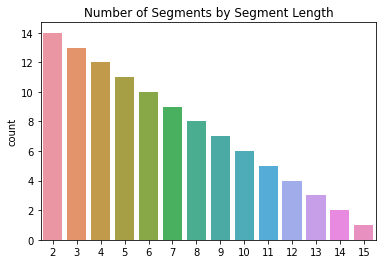

['Autodidacticism', 'Autodidacticis', 'utodidacticism', 'Autodidactici', 'utodidacticis', 'todidacticism', 'Autodidactic', 'utodidactici', 'todidacticis', 'odidacticism', 'Autodidacti', 'utodidactic', 'todidactici', 'odidacticis', 'didacticism', 'Autodidact', 'utodidacti', 'todidactic', 'odidactici', 'didacticis', 'idacticism', 'Autodidac', 'utodidact', 'todidacti', 'odidactic', 'didactici', 'idacticis', 'dacticism', 'Autodida', 'utodidac', 'todidact', 'odidacti', 'didactic', 'idactici', 'dacticis', 'acticism', 'Autodid', 'utodida', 'todidac', 'odidact', 'didacti', 'idactic', 'dactici', 'acticis', 'cticism', 'Autodi', 'utodid', 'todida', 'odidac', 'didact', 'idacti', 'dactic', 'actici', 'cticis', 'ticism', 'Autod', 'utodi', 'todid', 'odida', 'didac', 'idact', 'dacti', 'actic', 'ctici', 'ticis', 'icism', 'Auto', 'utod', 'todi', 'odid', 'dida', 'idac', 'dact', 'acti', 'ctic', 'tici', 'icis', 'cism', 'Aut', 'uto', 'tod', 'odi', 'did', 'ida', 'dac', 'act', 'cti', 'tic', 'ici', 'cis', 'ism'

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

def segments(string):
    
    lengths = [i for i in range(len(string))]
    segment_lists = [[string[start: end + 1] for start in lengths[:end]] for end in lengths[1:]][::-1]
    
    segs = []
    for segment_list in segment_lists:
        
        segs += segment_list
    
    segs.sort(key = len)
    segs = segs[::-1]
    
    return segs

# Testing 'segments()'
my_string = 'Autodidacticism'
my_segs = segments(my_string)
print(len(my_string))
sns.countplot([len(seg) for seg in my_segs])
plt.title('Number of Segments by Segment Length')
plt.show()
print(my_segs)

def similar_vars(series, similarity_threshold = 0.7, ignore_caps = True, print_sims = False):
    
    series_copy = series.copy().fillna('str_NaN')
    categories = pd.Series(index = series_copy.unique(), dtype = str)
    categories_copy = categories.copy()
    
    similar_pairs = []
    
    for category in categories.index:
        
        categories_copy = categories_copy.drop(category)
        
        if ignore_caps:
            
            category_segs = segments(category.lower())
            
        else:
            
            category_segs = segments(category)
        
        for other_category in categories_copy.index:
            
            similarity_score = 0
            
            copy_other = other_category
            
            for seg in category_segs:
                
                if ignore_caps:
                
                    if seg in copy_other.lower():

                        seg_idx = (copy_other.lower().find(seg), copy_other.lower().find(seg) + len(seg))
                        original_case_seg = copy_other[seg_idx[0]: seg_idx[1]]

                        similarity_score += (len(seg) / len(category))

                        copy_other = copy_other.replace(original_case_seg, '')
                        
                else:
                    
                    if seg in copy_other:
                        
                        similarity_score += (len(seg) / len(category))

                        copy_other = copy_other.replace(seg, '')
                    
            similarity_score -= abs(len(other_category) - len(category)) / len(category)
            
            if print_sims:
                
                print('{} & {}: Similarity = {}'.format(category, other_category, similarity_score))
            
            if similarity_score >= similarity_threshold:
                
                similar_pairs.append((category, other_category))
                
    return similar_pairs

# Testing 'similar_vars()'
categories = ['foo', 'FOO', 'BAR', 'bar', 'bar FOO', 'BAR foo', 'FOO bar', 'foo BAR', 'rab oof', 'oof rab', 'OOF', 
              'rab', 'oof', 'RAB', 'OBORAF']
my_series = pd.Series(data = [categories[np.random.randint(0, len(categories))] for i in range(1000)])
print(my_series)
print(similar_vars(my_series, print_sims = True))

In [5]:
# FizzBuzz

def fizz_buzz(up_to = 30, divisors = [3, 5]):
    """
    Returns a list of all the integers that are not divisible by any of the 'divisors', up to the value of 'up_to'.
    """
    
    return [i for i in range(up_to) if all([i % d for d in divisors])]

fizz_buzz()

[1, 2, 4, 7, 8, 11, 13, 14, 16, 17, 19, 22, 23, 26, 28, 29]

In [6]:
# Upper case count

def count_upper(txt_file):
    
    return len([character for character in open(txt_file).read() if character.isupper()])

count_upper('untitled.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'untitled.txt'